<a href="https://colab.research.google.com/github/XiaonaZhou/data_analytics_2/blob/main/Python/Unit_4/Decision_Tree_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with decision trees



## 1. import dataset

I'll use Boston Housing Dataset from seanborn package and build a decision trees model to prediction the price

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# import the boston dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()
# create a pandas dataframe and store the data
df_boston = pd.DataFrame(boston_dataset.data)
df_boston.columns = boston_dataset.feature_names
# append Price, target, as a new columnn to the dataset
df_boston['Price'] = boston_dataset.target

In [ ]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 2. Missing values and EDA

Skip. It has been done within `Linear_Regression_Boston_Housing_Guided_Project.ipynb`.


## 3. Build decision trees 

In [ ]:
# split data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_boston.drop('Price', axis=1), df_boston['Price'], test_size=0.30, random_state=101)

In [ ]:
# build model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# predict
y_pred = regressor.predict(x_test)

## 4. Evaluate mdoel

In [ ]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squred score: ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.416447368421053
Mean Squared Error: 22.551381578947368
Root Mean Squared Error: 4.748829495670209
R-squred score:  0.7728053013825433


Plot predicted vs true values

In [ ]:
df.head()

,Actual,Predicted
195,50.0,48.5
4,36.2,33.4
434,11.7,9.6
458,14.9,13.5
39,30.8,31.5


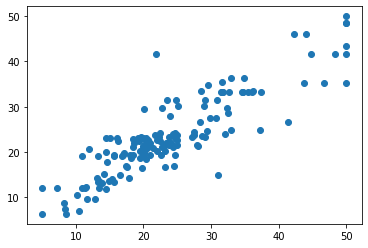

In [ ]:
plt.scatter(y_test,y_pred)
plt.show()

Recall that the R-squared score was 0.69 when using linear regression. With decision tree, the R-squared score was 0.78. We can confirm this with the plot above. Therefore, decision trees model works better when prediction boston housing price.